# Question 1

---



---



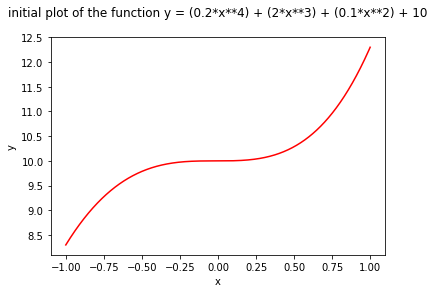

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.metrics import r2_score
import tensorflow as tf
import keras

# generate 30000 random values for x between -1 and 1
x = np.linspace(-1, 1, 30000)

# function that takes in x as an argument and returns corresponding y values.
def generateData(x):
  # calculate y using the function given.
  y = (0.2*x**4) + (2*x**3) + (0.1*x**2) + 10
  return y

y = generateData(x)


plt.title("initial plot of the function y = (0.2*x**4) + (2*x**3) + (0.1*x**2) + 10\n")
plt.plot(x, y, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Question 2

---



---



In [ ]:
# function that shuffles the data, takes in yes or no as an argument.
def shuffleData(x,decision):
  if decision == 'no':
    x = np.linspace(-1, 1, 30000)
    y = generateData(x)
    return x,y
  elif decision == 'yes':
    x = np.linspace(-1, 1, 30000)
    np.random.shuffle(x)
    y = generateData(x)
    return x,y

# Question 3

---



---



In [ ]:
def splitDataIntoTrainValidationTest(x,y,testRatio,valRatio):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testRatio,shuffle=False)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=valRatio,shuffle=False) # 0.25 x 0.8 = 0.2
  return x_train, y_train, x_test, y_test, x_val, y_val 

#Question 4 

---



---



In [ ]:
def scaleData(x):
  scaled = (x-min(x)) / (max(x)-min(x))
  return scaled

#Question 5

---



---



In [ ]:
def returnMetrics(actual,predicted):
  MAE = mean_absolute_error(actual,predicted)
  MSE = mean_squared_error(actual,predicted)
  RMSE = math.sqrt(MSE)
  R2 = r2_score(actual,predicted)
  print('The MAE is: ',MAE)
  print('The MSE is: ',MSE)
  print('The RMSE is: ',RMSE)
  print('The R2 is:',R2)

#Implementation

---



---



# Next 5 cases are implemented with shuffled data

# Case 1 shuffled and unscaled data

[ 0.77939265  0.77745925 -0.80926031 ... -0.72985766 -0.34931164
 -0.39351312]
[11.08143374 11.07337395  9.09129683 ...  9.33244244  9.92993452
  9.89840808]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 12)                24        
                                                                 
 dense_49 (Dense)            (None, 8)                 104       
                                                                 
 dense_50 (Dense)            (None, 4)                 36        
                                                                 
 dense_51 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [=========

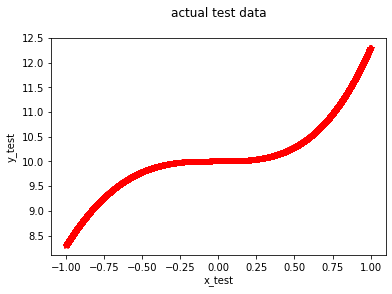

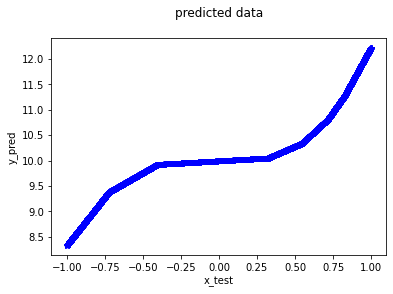

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'yes')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='relu',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train, y_train,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


#Case 2: shuffled and unscaled

---



---



[-0.32931098 -0.05276843  0.8178606  ... -0.8109937  -0.54938498
  0.5268509 ]
[ 9.94177194  9.99998613 11.25050124 ...  9.08548917  9.71676693
 10.33564439]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                48        
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 43.1305
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1064
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0644
Epoch 4/20
750/750 [==============================] 

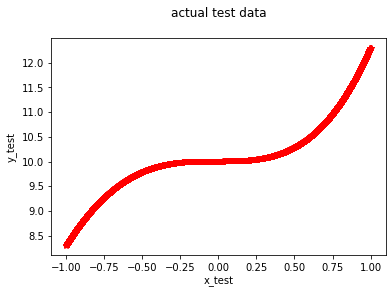

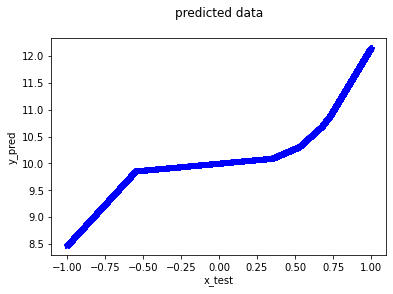

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'yes')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

model = keras.Sequential([
    keras.layers.Dense(units=24, activation='relu',input_shape=(1,)),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train, y_train,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


#Case 3: shuffled and unscaled

[-0.82359412  0.77985933  0.89766326 ... -0.03796793  0.30944365
 -0.45318177]
[ 9.04255111 11.08338536 11.65711532 ... 10.00003511 10.07067114
  9.84282979]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                24        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==========

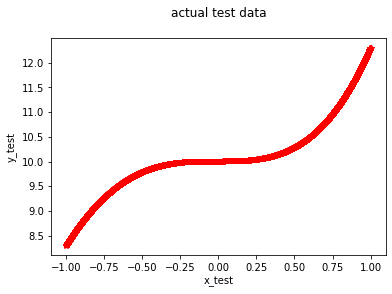

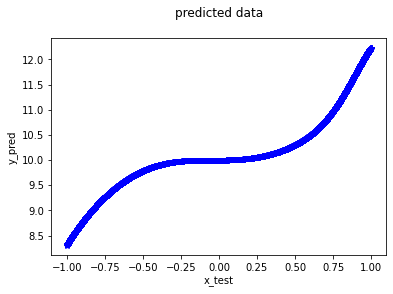

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'yes')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='tanh',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='tanh'),
    keras.layers.Dense(units=4, activation='tanh'),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train, y_train,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


# Case 4: shuffled and scaled. First, shuffle, then split, then scale

[ 0.78779293 -0.79479316 -0.71172372 ...  0.41064702 -0.79565986
 -0.40804693]
[11.11693149  9.13884204  9.38092554 ... 10.161046    9.13604005
  9.88631333]
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 12)                24        
                                                                 
 dense_53 (Dense)            (None, 8)                 104       
                                                                 
 dense_54 (Dense)            (None, 4)                 36        
                                                                 
 dense_55 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [=========

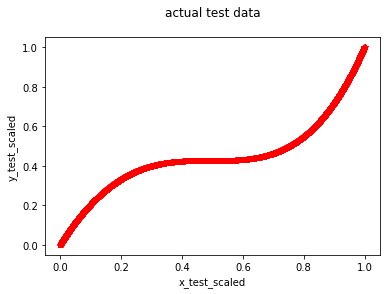

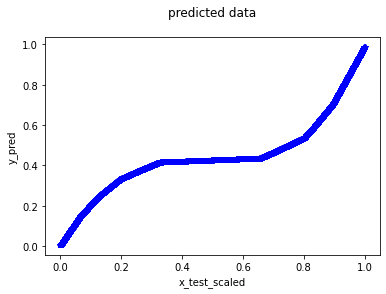

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'yes')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

# SCALE
x_train_scaled = scaleData(x_train)
y_train_scaled = scaleData(y_train)
x_test_scaled = scaleData(x_test)
y_test_scaled = scaleData(y_test)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='relu',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train_scaled, y_train_scaled,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test_scaled, y_test_scaled)
y_pred = model.predict(x_test_scaled)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test_scaled, y_test_scaled,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test_scaled")
plt.ylabel("y_test_scaled")
plt.show()

plt.plot(x_test_scaled, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test_scaled")
plt.ylabel("y_pred")
plt.show()


#Case 5: shuffled and scaled. First shuffle then split then scale.

[-0.5579186  -0.08836961  0.56518551 ...  0.93073102 -0.25357512
  0.97613254]
[ 9.70317534  9.99941293 10.41343084 ... 11.84921795  9.97464701
 12.13704825]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                24        
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==========

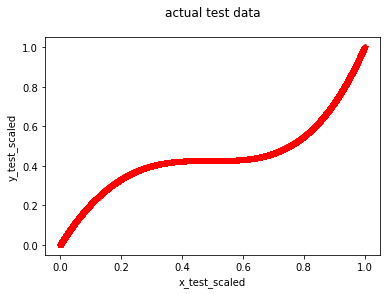

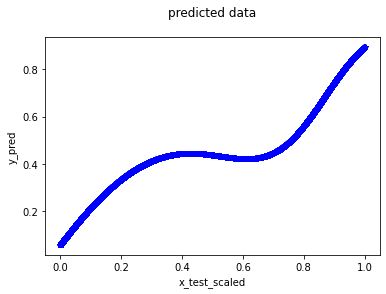

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'yes')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

# SCALE
x_train_scaled = scaleData(x_train)
y_train_scaled = scaleData(y_train)
x_test_scaled = scaleData(x_test)
y_test_scaled = scaleData(y_test)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='tanh',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='tanh'),
    keras.layers.Dense(units=4, activation='tanh'),
    keras.layers.Dense(units=1, activation='tanh')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train_scaled, y_train_scaled,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test_scaled, y_test_scaled)
y_pred = model.predict(x_test_scaled)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test_scaled,y_pred)
plt.plot(x_test_scaled, y_test_scaled,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test_scaled")
plt.ylabel("y_test_scaled")
plt.show()

plt.plot(x_test_scaled, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test_scaled")
plt.ylabel("y_pred")
plt.show()


# Next 5 cases are implemented with unshuffled data

#Case 1: unshuffled and unscaled data

[-1.         -0.99993333 -0.99986666 ...  0.99986666  0.99993333
  1.        ]
[ 8.3         8.30033332  8.30066661 ... 12.29906677 12.29953335
 12.3       ]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                24        
                                                                 
 dense_41 (Dense)            (None, 8)                 104       
                                                                 
 dense_42 (Dense)            (None, 4)                 36        
                                                                 
 dense_43 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [=========

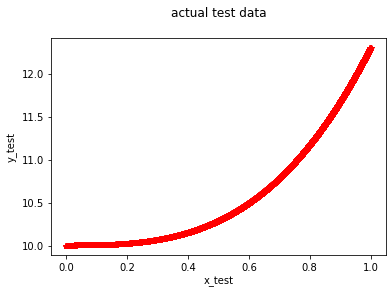

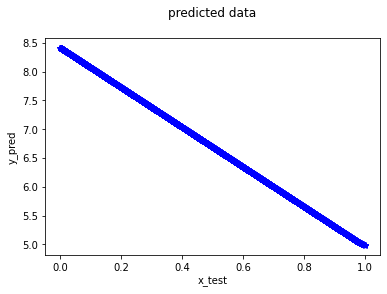

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'no')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='relu',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train, y_train,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)

plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


# Case 2: unshuffled and unscaled

[-1.         -0.99993333 -0.99986666 ...  0.99986666  0.99993333
  1.        ]
[ 8.3         8.30033332  8.30066661 ... 12.29906677 12.29953335
 12.3       ]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 24)                48        
                                                                 
 dense_23 (Dense)            (None, 1)                 25        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 2s 1ms/step - loss: 26.4523
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 2.1758
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 1.6805
Epoch 4/20
750/750 [==============================] 

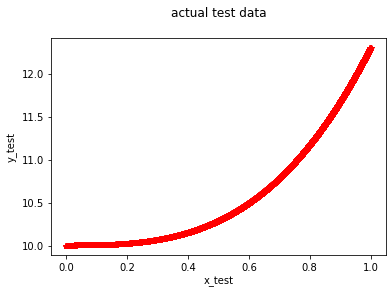

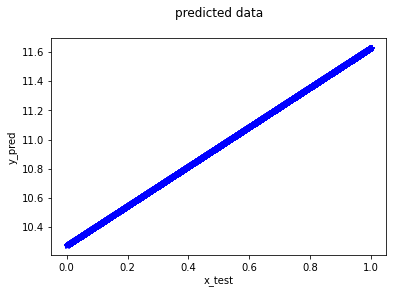

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'no')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

model = keras.Sequential([
    keras.layers.Dense(units=24, activation='relu',input_shape=(1,)),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train, y_train,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("\nThe following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


#Case 3: unshuffled and unscaled

[-1.         -0.99993333 -0.99986666 ...  0.99986666  0.99993333
  1.        ]
[ 8.3         8.30033332  8.30066661 ... 12.29906677 12.29953335
 12.3       ]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                24        
                                                                 
 dense_25 (Dense)            (None, 8)                 104       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==========

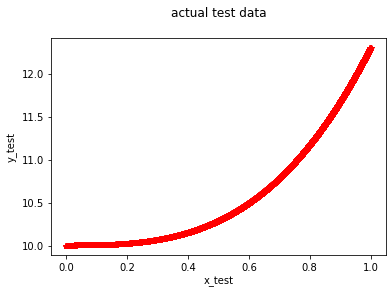

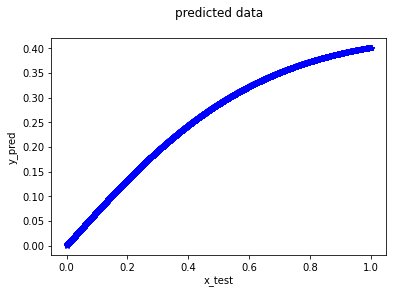

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'no')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='tanh',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='tanh'),
    keras.layers.Dense(units=4, activation='tanh'),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train, y_train,epochs=20,batch_size=12)

evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


# Case 4: unshuffled then split then scale

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 12)                24        
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0185
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 2.2836e-04
Epoch 3/20
750/750 [==

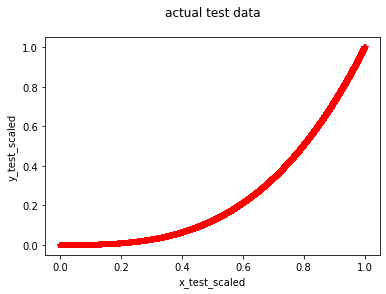

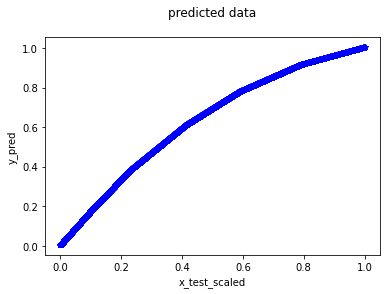

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'no')

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

# SCALE
x_train_scaled = scaleData(x_train)
x_test_scaled = scaleData(x_test)
y_test_scaled = scaleData(y_test)
y_train_scaled = scaleData(y_train)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='relu',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train_scaled, y_train_scaled,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test_scaled, y_test_scaled)
y_pred = model.predict(x_test_scaled)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test_scaled,y_pred)
plt.plot(x_test_scaled, y_test_scaled,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test_scaled")
plt.ylabel("y_test_scaled")
plt.show()

plt.plot(x_test_scaled, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test_scaled")
plt.ylabel("y_pred")
plt.show()


# Case 5: unshuffled then split then scale

[-1.         -0.99993333 -0.99986666 ...  0.99986666  0.99993333
  1.        ]
[ 8.3         8.30033332  8.30066661 ... 12.29906677 12.29953335
 12.3       ]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 12)                24        
                                                                 
 dense_33 (Dense)            (None, 8)                 104       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==========

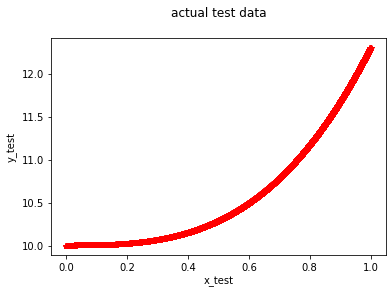

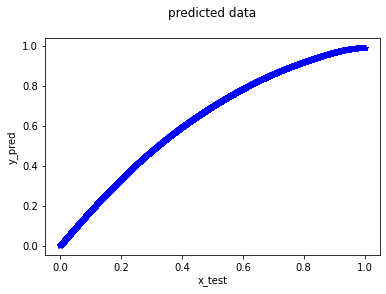

In [ ]:
# GENERATE 
x = np.linspace(-1, 1, 30000)
y = generateData(x)

# SHUFFLE
x,y = shuffleData(x,'no')
print(x)
print(y)

# SPLIT
x_train, y_train, x_test, y_test, x_val, y_val = splitDataIntoTrainValidationTest(x,y,0.50,0.40)

# SCALE
x_train_scaled = scaleData(x_train)
y_train_scaled = scaleData(y_train)

model = keras.Sequential([
    keras.layers.Dense(units=12, activation='tanh',input_shape=(1,)),
    keras.layers.Dense(units=8, activation='tanh'),
    keras.layers.Dense(units=4, activation='tanh'),
    keras.layers.Dense(units=1, activation='tanh')
])
model.summary()
model.compile(optimizer='adam', 
              loss='MSE')
losses = model.fit(x_train_scaled, y_train_scaled,epochs=20,batch_size=12)
evaluation = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)

print("The following are the metrics:\n")
returnMetrics(y_test,y_pred)
plt.plot(x_test, y_test,'r*')
plt.title('actual test data\n')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

plt.plot(x_test, y_pred,'b*')
plt.title('predicted data\n')
plt.xlabel("x_test")
plt.ylabel("y_pred")
plt.show()


# Question 6

In [ ]:
import numpy as np

# Define the input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the number of nodes in the input layer, hidden layer, and output layer
input_nodes = 2
hidden_nodes = 3
output_nodes = 1

# Initialize the weights and biases with random values
w1 = np.random.randn(input_nodes, hidden_nodes)
b1 = np.random.randn(hidden_nodes)
w2 = np.random.randn(hidden_nodes, output_nodes)
b2 = np.random.randn(output_nodes)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define learning rate
learning_rate = 0.1

# Train the neural network
for i in range(10000):
    # Forward propagation
    hidden_layer_activation = np.dot(X, w1) + b1
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, w2) + b2
    predicted_output = sigmoid(output_layer_activation)
    
    # Backward propagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(w2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update the weights and biases
    w2 = w2 + hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    b2 = b2 + np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    w1 = w1 + X.T.dot(d_hidden_layer) * learning_rate
    b1 = b1 + np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the neural network
hidden_layer_activation = np.dot(X, w1) + b1
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output, w2) + b2
predicted_output = sigmoid(output_layer_activation)
print(predicted_output)


[[0.05019602]
 [0.95135392]
 [0.95434959]
 [0.04240474]]
